# Examen Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

---
# Primer punto. Optimización de funciones con `SymPy`

Considere una cruz simétrica inscrita en un círculo de radio $r$

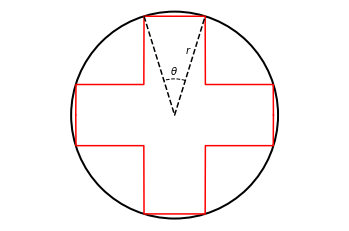

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

ct = np.cos(0.3)
st = np.sin(0.3)
x = np.linspace(-ct,ct,1000)
y = np.zeros(np.shape(x))
y[1:500] = [st if i < -st else ct for i in x[1:500]]
y[500:999] = [st if i > st else ct for i in x[500:999]]

p = patches.Circle((0, 0), 1,fc='w',lw=2,color='k')
ax = plt.gca()
ax.add_artist(p)
plt.text(0.1,0.6,'$r$')

plt.plot(x,y,'r')
plt.plot(x,-y,'r')

plt.plot([-st,0,st],[ct,0,ct],'k--')
plt.text(-0.04,0.4,r'$\theta$')
a = patches.Arc((0, 0),0.7,0.7,90,theta1=-0.3*180/np.pi,theta2=0.3*180/np.pi,
                fc='w',color='k',ls='--')
ax.add_artist(a)

plt.axis([-1,1,-1,1])
plt.axis('equal')
plt.axis('off')
#plt.tight_layout()
plt.show()

1. Escribir el área $A$ de la cruz como una función de $\theta$. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*.
2. Determinar el valor de $\theta$ que maximiza el área para un radio $r=2$.
3. ¿Cuál es el área máxima de la cruz?

**Pista:** Divida la cruz en cuatro partes iguales determinadas por los ejes $x$ y $y$. El resto es trigonometría básica.

### 1. Escribir el área $A$ de la cruz como una función de $\theta$
>Primero dividimos la cruz en cuatro partes iguales, formando 4 rectángulos. Debemos maximizar el área de cada rectángulo y después maximizar esta área.

>Si dividimos a un ángulo justo por la mitad formaremos un triángulo rectángulo, con eso podemos usar las identidades trigronométricas para calcular sus catetos a partir de su hipotenusa, en este caso la hipotenusa es el radio del círculo que es igual a 2cm.

>A continuación el planteamiento gráfico que origina la función a maximizar

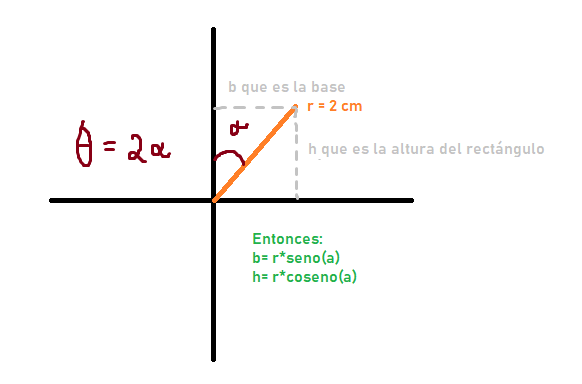

> Formamos la función a maximizar a partir de la fórmula del área de un rectángulo $ A=b*h $:
>> - $ b= r*sin(\theta) $ y $h= r*cos(\theta)$
>> - Cada rectángulo que obtenemos por este método representa un octavo del área de la cruz, hasta el momento la función sería: $$ A(\theta) = 8r^2*sin(\theta)*cos(\theta) $$
>> - El área del centro de la cruz es un cuadrado cuyos lados están formados por $ 2b $ y su área debe ser restada de la función anterior, entonces la **función de área de la cruz queda como:** $$ A(\theta) = 4r^2*(2sin(\theta)*cos(\theta) - sin^2(\theta)) $$


### 2. Determinar el valor de $\theta$ que maximiza el área para un radio $r=2$

Nuestra función a maximizar es:

$$ A(\theta) = 4r^2*(2sin(\theta)*cos(\theta) - sin^2(\theta)) $$

Conocemos el valor de r entonces queda como:

$$ A(\theta) = 16*(2sin(\theta)*cos(\theta) - sin^2(\theta)) $$


In [12]:
import sympy as sp
import numpy as np

In [77]:
# Formamos la función y declaramos las variables
fun=16*((2*(sp.sin(x))*(sp.cos(x))) - ((sp.sin(x))**2))
sp.var("x")

# Encontramos la primera derivada y puntos críticos
d=sp.diff(fun,x)
pc=sp.solve(d,x)

for i in pc:
    res=round(i,2)
    print(res)
    
    dd=sp.diff(d,x)
    prueba=dd.subs(x,i)
    if prueba==0:
        print("insuficiente")
    elif prueba>0:
        print("min")
    elif prueba<0:
        print("max")


2.12
min
-2.59
max
-1.02
min
0.55
max


Observando los resultados de los puntos críticos nos damos cuenta que el valor de alfa factible es de 0.55 radianes, porque alfa es igual a dos theta, por lo tanto, theta no puede ser mayor a 1.57 radianes ($ 6\pi /4 $) y tener un valor negativo de theta hace que el ángulo sea aún mayor. 

Entonces, el valor de theta que hace del área máxima es de **aprox. 1.11 rad**.

### 3. ¿Cuál es el área máxima de la cruz?

In [80]:
# Sustituimos el valor del punto crítico en una función de numpy

def funcion1(x):
    return 16*((2*(np.sin(x))*(np.cos(x))) - ((np.sin(x))**2))

resultado=funcion1(0.55)
print(resultado)

9.888086732387585


El **área máxima de la cruz** se forma cuando $\theta=0.55$ radianes y es de **9.888 cm2**

---
# Segundo punto. Programación lineal
Una fábrica de confitería está interesada en mezclar tres de sus marcas principales de golosinas (M1, M2, M3) para obtener tres nuevos productos (P1, P2, P3), que desea vender al precio de 4,3,2 u.m. por caja, respectivamente.
La empresa puede importar 2000 cajas de M1, 4000 de la M2 y 1000 de la M3, siendo el precio que debe pagar de 3,2 y 1 u.m. por cada tipo de caja.

El proveedor solicita que el Producto 1 (P1) contenga como mínimo el 80% de M1 y como máximo el 20% de M3. El producto 2 (P2) deberá contener como mínimo el 20% de M1 y no más del 80% de M3. El producto 3 (P3) no podrá contener más del 70% de M3.

Encuentre la combinación que le genere el **máximo** beneficio (precio de venta menos el costo).

Use las variables $x_{ij}$: Como la cantidad de la marca $i$ en el producto $j$.

1. Escriba la función objetivo a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas de $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad
\end{equation}
2. Resuelva el problema utilizando la función `linprog`. ¿Cuál es la combinación óptima para cada producto?, ¿Cuál es el beneficio que se genera?

---
# Tercer punto. Ajuste de curvas
Los siguientes datos extraidos de la Federal Reserve Economic Data (FRED), son los salarios por empleado equivalente a tiempo completo en industrias privadas de EE.UU.: fondos, fideicomisos, etc. **entre los años 1998 y 2018**. 

https://www.quandl.com/data/FRED/N4461C0A052NBEA-Wage-and-salary-accruals-per-full-time-equivalent-employee-Domestic-private-industries-Funds-trusts-and-other-financial-vehicles 

In [84]:
import numpy as np
y=np.array([ 55887.,  59365.,  65435.,  68065.,  71918.,  77257.,  92036.,
        92645.,  99857.,  74935.,  78597.,  83134.,  87372., 104196.,
       112597., 133821., 129107., 138259., 139083., 143762., 147334.])
x=np.arange(8,29)

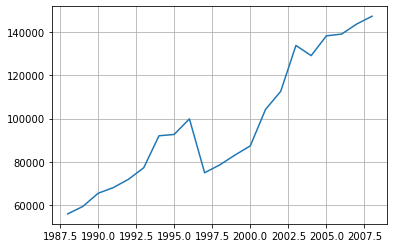

In [85]:
plt.plot(x+1980,y)
plt.grid()

1. Ajuste los salarios con polinomios de grado 1 a 3 y muestre los errores de forma gráfica, ¿Qué polinómio se ajusta mejor?
2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste
3. Use el modelo para averiguar el salario a mediados del año 2005 y para predecirlo en el año 2025. ¿Qué diferencias encuentra en cuanto a la interpolación (esto es, obtener un punto medio) y la extrapolación  (es decir, obtener un dato fuera del rango conocido)?

### 1. Ajuste los salarios con polinomios de grado 1 a 3 y muestre los errores de forma gráfica, ¿Qué polinómio se ajusta mejor?

In [88]:
import scipy.optimize as opt

# Definimos la función del error cuadrático para minimizarlo

def fun(beta,X,y,m):
    beta=np.reshape(beta, [m, -1])
    pred= X @ beta
    error= (y-pred).T @ (y-pred)
    
    return error[0][0]

# Formamos las matrices X
n=len(x)
x=np.reshape(x, [n, -1])
x0= np.ones([n, 1])
x1= x
x2= np.reshape(x**2,[n, -1] )
x3= np.reshape(x**3, [n, -1])

Xlin=np.hstack((x0,x1))
X2=np.hstack((x0,x1,x2))
X3=np.hstack((x0,x1,x2,x3))

# Betas Iniciales
beta_1=np.random.rand(2)
beta_2=np.random.rand(3)
beta_3=np.random.rand(4)

# Matriz de datos y
y= np.reshape(y, [n, -1])

sol1=opt.minimize(fun, beta_1, args=(Xlin,y,2))
sol1

      fun: 2247933171.754468
 hess_inv: array([[ 0.23425329, -0.01169186],
       [-0.01169186,  0.00064958]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 54
      nit: 6
     njev: 18
   status: 0
  success: True
        x: array([16474.8849785 ,  4520.34294477])

In [89]:
sol2=opt.minimize(fun, beta_2, args=(X2,y,3))
sol2

      fun: 1818616347.0161762
 hess_inv: array([[ 1.88815631e-01, -1.14089216e-02,  1.11920216e-04],
       [-1.14089216e-02,  1.28550591e-03, -3.25250483e-05],
       [ 1.11920216e-04, -3.25250483e-05,  1.31256549e-06]])
      jac: array([  0.,  16., 416.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 187
      nit: 10
     njev: 44
   status: 2
  success: False
        x: array([56224.75146764,  -459.91337657,   138.3404109 ])

In [90]:
sol3=opt.minimize(fun, beta_3, args=(X3,y,4))
sol3

      fun: 1746809626.493174
 hess_inv: array([[ 3.21471037e-02, -3.14633048e-02,  2.94663509e-03,
        -6.88631176e-05],
       [-3.14633048e-02,  3.13994416e-02, -2.95168466e-03,
         6.91279354e-05],
       [ 2.94663509e-03, -2.95168466e-03,  2.82388663e-04,
        -6.69893297e-06],
       [-6.88631176e-05,  6.91279354e-05, -6.69893297e-06,
         1.60606477e-07]])
      jac: array([ 0.,  0.,  0., 32.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 447
      nit: 18
     njev: 87
   status: 2
  success: False
        x: array([6328.79274168, 9268.85953382, -441.3901683 ,   10.73572557])

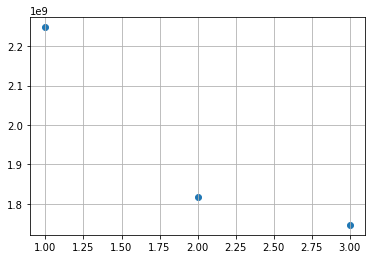

In [92]:
plt.figure()
xs=[1,2,3]
ys=[ 2247933171.754468,1818616347.0161762,1746809626.493174]
plt.scatter(xs,ys)
plt.grid()

La función que mejor predice el fenómeno es el **polinomio de grado tres**

### 2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste

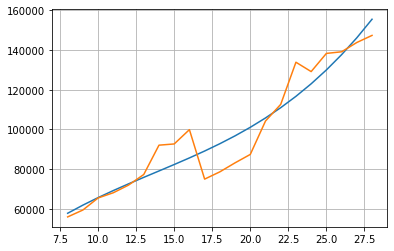

In [98]:
plt.figure()
plt.plot(x,6328.79274168+9268.85953382*x-(441.3901683*x**2)+(10.73572557*x**3))
plt.plot(x,y)
plt.grid()

### Salario a mediados del año 2005 y en el año 2025

In [100]:
def f_sal(x):
    return 6328.79274168+9268.85953382*x-(441.3901683*x**2)+(10.73572557*x**3)

salario5=f_sal(2005-1980)
salario15=f_sal(2015-1980)

print(salario5)
print(salario15)

129927.13793092998
250330.15407162992


Según el modelo, el salario para 2005 es de **130,000 pesos approx** y para 2015 **será de 250,330 pesos**

Interpolar un dato no siempre da un resultado "real", peor el resultado si está dentro de un intervalo de confianza. Al mismo tiempo extrapolar un dato no quiere decir que sea real, pero si que lo que obtenemos estará dentro de un intervalo de confianza que nos servirá.